In [1]:
import pandas as pd

url = "postgresql://localhost/test?user=postgres&password=248655"


def batch_load_sql(query: str) -> pd.DataFrame:
    CHUNKSIZE = 200000

    chunks = []
    for chunk_dataframe in pd.read_sql(query, url, chunksize=CHUNKSIZE):
        chunks.append(chunk_dataframe)
    return pd.concat(chunks, ignore_index=True)


data = batch_load_sql("""
SELECT pe.name, pe.description, pe.time_start, pe.ticket_type_id,
    ptt.price,
    pe.theme_id, pt.name AS theme_name,
    pet.name AS type_name
FROM program_event pe 
JOIN core_tickettype ptt ON pe.ticket_type_id=ptt.id
JOIN program_eventtype pet ON pe.type_id=pet.id
JOIN program_theme pt ON pe.theme_id=pt.id
WHERE pe.published=TRUE""")
data

,name,description,time_start,ticket_type_id,price,theme_id,theme_name,type_name
0,Мастер-Класс от партнера Hochland. Трендовые р...,,2021-10-07 11:30:00+00:00,169,0.0,1,ПИР-РЕСТОРАН 2021,Мастер-класс
1,"Виды пасты и равиоли, техника лепки.",Уточняется,2021-10-05 11:30:00+00:00,155,0.0,1,ПИР-РЕСТОРАН 2021,Мастер-класс
2,Современное проектирование кухонных пространст...,*Уточняется*,2022-10-18 12:45:00+00:00,473,1500.0,10,ПИР-РЕСТОРАН 2022,Семинар
3,Подбор оборудования для кондитерского и пекарс...,,2021-10-05 07:30:00+00:00,122,2000.0,1,ПИР-РЕСТОРАН 2021,Семинар
4,Волжские сезоны: особенности работы с локальны...,,2021-10-07 12:30:00+00:00,13,0.0,1,ПИР-РЕСТОРАН 2021,Мастер-класс
...,...,...,...,...,...,...,...,...
1030,В центре внимания гость: как получить свою ауд...,Основные темы сессии:<br>1. Аналитика и методы...,2024-10-21 07:30:00+00:00,1167,2700.0,42,ПИР-ОТЕЛЬ 2024,Семинар
1031,Сезонность.НЕТ. Партнерство ОТА и отеля круглы...,- Как ОТА могут помочь поднять загрузку в низк...,2024-10-22 10:40:00+00:00,1170,0.0,42,ПИР-ОТЕЛЬ 2024,Экспертная сессия
1032,Проведение Стратегической сессии для команды о...,На сессии поговорим об эффективном формате раб...,2024-10-22 09:30:00+00:00,996,2700.0,42,ПИР-ОТЕЛЬ 2024,Семинар
1033,200 сэндвичей с мортаделлой и 120 чашек кофе в...,Как появилась идея создать проект и почему он ...,2024-10-23 13:20:00+00:00,1171,1000.0,38,ПИР-КОФЕ 2024,Лекция


In [4]:
import re


def clean_text(x):
    if pd.notna(x):
        s = str(x).strip().lower()

        s = re.sub(r'(?<=\s)[^\w\s]+(?=\s)', '', s)
        s = re.sub(r'(?<=\w|\d)[\W\d]+(?=\w|\d)', ' ', s)
        s = re.sub(r'(?<=\w|\d)[\W\d]+$', ' ', s)
        s = re.sub(r'^[^a-zA-Zа-яА-Я]+', '', s)

        return ' '.join(s.strip().split())
    return ''


data['name'] = data['name'].apply(clean_text)
data['name'] = data['name'].apply(lambda x: x.replace('br', ''))

data['description'] = data['description'].apply(clean_text)
data['description'] = data['description'].apply(lambda x: x.replace('br', ''))

data['type_name'] = data['type_name'].apply(clean_text)
data

,name,description,time_start,ticket_type_id,price,theme_id,theme_name,type_name
0,мастер класс от партнера hochland трендовые ре...,,2021-10-07 11:30:00+00:00,169,0.0,1,ПИР-РЕСТОРАН 2021,мастер класс
1,виды пасты и равиоли техника лепки,уточняется,2021-10-05 11:30:00+00:00,155,0.0,1,ПИР-РЕСТОРАН 2021,мастер класс
2,современное проектирование кухонных пространст...,уточняется,2022-10-18 12:45:00+00:00,473,1500.0,10,ПИР-РЕСТОРАН 2022,семинар
3,подбор оборудования для кондитерского и пекарс...,,2021-10-05 07:30:00+00:00,122,2000.0,1,ПИР-РЕСТОРАН 2021,семинар
4,волжские сезоны особенности работы с локальным...,,2021-10-07 12:30:00+00:00,13,0.0,1,ПИР-РЕСТОРАН 2021,мастер класс
...,...,...,...,...,...,...,...,...
1030,в центре внимания гость как получить свою ауди...,основные темы сессии аналитика и методы изучен...,2024-10-21 07:30:00+00:00,1167,2700.0,42,ПИР-ОТЕЛЬ 2024,семинар
1031,сезонность нет партнерство ота и отеля круглый...,как ота могут помочь поднять загрузку в низкий...,2024-10-22 10:40:00+00:00,1170,0.0,42,ПИР-ОТЕЛЬ 2024,экспертная сессия
1032,проведение стратегической сессии для команды о...,на сессии поговорим об эффективном формате раб...,2024-10-22 09:30:00+00:00,996,2700.0,42,ПИР-ОТЕЛЬ 2024,семинар
1033,сэндвичей с мортаделлой и чашек кофе в день ка...,как появилась идея создать проект и почему он ...,2024-10-23 13:20:00+00:00,1171,1000.0,38,ПИР-КОФЕ 2024,лекция


In [5]:
data.isna().sum()

name              0
description       0
time_start        0
ticket_type_id    0
price             0
theme_id          0
theme_name        0
type_name         0
dtype: int64

In [6]:
data[['theme_id', 'theme_name']].value_counts()

theme_id  theme_name          
23        ПИР-РЕСТОРАН 2023       172
34        ПИР-РЕСТОРАН 2024       158
10        ПИР-РЕСТОРАН 2022       142
1         ПИР-РЕСТОРАН 2021       137
2         ПИР-ОТЕЛЬ 2021           73
42        ПИР-ОТЕЛЬ 2024           70
24        ПИР-ОТЕЛЬ 2023           68
9         ПИР-ОТЕЛЬ 2022           45
11        ПИР-КОФЕ 2022            44
22        ПИР-КОФЕ 2023            44
38        ПИР-КОФЕ 2024            41
25        ПИР-ФРАНЧАЙЗИНГ 2023     22
17        ПИР-ФРАНЧАЙЗИНГ 2022     19
Name: count, dtype: int64

In [7]:
restaurant = [1, 10, 23, 34]
franchising = [17, 25]
coffee = [11, 22, 38]
hotel = [2, 9, 24, 42]

In [8]:
def filter_theme(x):
    if x in coffee:
        return 'кофе'
    elif x in hotel:
        return 'отель'
    elif x in restaurant:
        return 'ресторан'
    elif x in franchising:
        return 'франчайзинг'

    return 'nan'


data['theme'] = data['theme_id'].apply(filter_theme)
data.drop(columns=['theme_id', 'theme_name'], inplace=True)
data

,name,description,time_start,ticket_type_id,price,type_name,theme
0,мастер класс от партнера hochland трендовые ре...,,2021-10-07 11:30:00+00:00,169,0.0,мастер класс,ресторан
1,виды пасты и равиоли техника лепки,уточняется,2021-10-05 11:30:00+00:00,155,0.0,мастер класс,ресторан
2,современное проектирование кухонных пространст...,уточняется,2022-10-18 12:45:00+00:00,473,1500.0,семинар,ресторан
3,подбор оборудования для кондитерского и пекарс...,,2021-10-05 07:30:00+00:00,122,2000.0,семинар,ресторан
4,волжские сезоны особенности работы с локальным...,,2021-10-07 12:30:00+00:00,13,0.0,мастер класс,ресторан
...,...,...,...,...,...,...,...
1030,в центре внимания гость как получить свою ауди...,основные темы сессии аналитика и методы изучен...,2024-10-21 07:30:00+00:00,1167,2700.0,семинар,отель
1031,сезонность нет партнерство ота и отеля круглый...,как ота могут помочь поднять загрузку в низкий...,2024-10-22 10:40:00+00:00,1170,0.0,экспертная сессия,отель
1032,проведение стратегической сессии для команды о...,на сессии поговорим об эффективном формате раб...,2024-10-22 09:30:00+00:00,996,2700.0,семинар,отель
1033,сэндвичей с мортаделлой и чашек кофе в день ка...,как появилась идея создать проект и почему он ...,2024-10-23 13:20:00+00:00,1171,1000.0,лекция,кофе


In [9]:
# nlp = spacy.load("ru_core_news_sm")
# 
# 
# def lem_text(x):
#     return ' '.join([token.lemma_ for token in nlp(x)])
# 
# 
# data['name'] = data['name'].apply(lem_text)
# data['description'] = data['description'].apply(lem_text)

In [10]:
data.to_csv('Data/events.csv', index=False)

In [11]:
from sklearn.base import TransformerMixin, BaseEstimator


class DateTimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X):
        return self

    @staticmethod
    def transform(self, X):
        start_date_per_year = X.groupby(X.dt.year).transform('min')

        return pd.concat([X.dt.year,
                          (X - start_date_per_year).dt.days], axis=1)

    def get_feature_names_out(self, input_features):
        return ['year', 'day']

In [16]:
import nltk
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
russian_stopwords = list(set(stopwords.words('russian')))
english_stopwords = list(set(stopwords.words('english')))


class TfidfClusterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words=russian_stopwords + english_stopwords)
        self.pca = PCA(n_components=20)
        self.kmeans = KMeans(n_clusters=5)
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        tfidf_matrix = self.vectorizer.fit_transform(raw_documents=X)
        pca_res = self.pca.fit_transform(tfidf_matrix)
        self.scaler.fit(self.kmeans.fit_transform(pca_res))
        return self

    def transform(self, X):
        tfidf_matrix = self.vectorizer.transform(X)
        res = self.kmeans.transform(self.pca.transform(tfidf_matrix))
        return pd.DataFrame(self.scaler.transform(res))

    def get_feature_names_out(self, input_features):
        return ['d2c1', 'd2c2', 'd2c3', 'd2c4', 'd2c5']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\merku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

t = [
    ('name', TfidfClusterTransformer(), 'name'),
    ('desc', TfidfClusterTransformer(), 'description'),
    ('ohe', OneHotEncoder(drop=['франчайзинг']), ['theme']),
    ('time', DateTimeTransformer(), 'time_start'),
    ('scl', MinMaxScaler(), ['price'])
]

col_transformer = ColumnTransformer(transformers=t,
                                    remainder='passthrough',
                                    force_int_remainder_cols=False)

In [18]:
from sklearn.preprocessing import LabelEncoder

model_data = data.copy()
model_data['type_name'] = LabelEncoder().fit_transform(model_data['type_name'])
model_data.head()

,name,description,time_start,ticket_type_id,price,type_name,theme
0,мастер класс от партнера hochland трендовые ре...,,2021-10-07 11:30:00+00:00,169,0.0,10,ресторан
1,виды пасты и равиоли техника лепки,уточняется,2021-10-05 11:30:00+00:00,155,0.0,10,ресторан
2,современное проектирование кухонных пространст...,уточняется,2022-10-18 12:45:00+00:00,473,1500.0,16,ресторан
3,подбор оборудования для кондитерского и пекарс...,,2021-10-05 07:30:00+00:00,122,2000.0,16,ресторан
4,волжские сезоны особенности работы с локальным...,,2021-10-07 12:30:00+00:00,13,0.0,10,ресторан


In [19]:
model_data = col_transformer.fit_transform(model_data)
cols = pd.Series(col_transformer.get_feature_names_out()).apply(lambda x: x.replace('__', '_'))
cols[16] = 'ticket_type_id'
cols[17] = 'type'

model_data = pd.DataFrame(model_data, columns=cols)
model_data.head()

,name_d2c1,name_d2c2,name_d2c3,name_d2c4,name_d2c5,desc_d2c1,desc_d2c2,desc_d2c3,desc_d2c4,desc_d2c5,ohe_theme_кофе,ohe_theme_отель,ohe_theme_ресторан,time_year,time_day,scl_price,ticket_type_id,type
0,0.175266,0.078259,0.117576,0.177017,0.113682,-0.535075,-0.860179,-0.109404,-0.165051,-0.450402,0.0,0.0,1.0,2021.0,2.0,0.000000,169.0,10.0
1,-1.011822,-0.770516,-0.771994,-0.832737,-1.223474,4.511080,4.023306,-6.714102,3.171172,4.532842,0.0,0.0,1.0,2021.0,0.0,0.000000,155.0,10.0
2,1.800484,1.678102,1.794636,1.522315,1.688337,4.511080,4.023306,-6.714102,3.171172,4.532842,0.0,0.0,1.0,2022.0,1.0,0.142857,473.0,16.0
3,-0.890099,-0.771662,-0.747745,-0.910451,-1.240172,-0.535075,-0.860179,-0.109404,-0.165051,-0.450402,0.0,0.0,1.0,2021.0,0.0,0.190476,122.0,16.0
4,0.439503,0.657783,0.598920,0.518515,0.616021,-0.535075,-0.860179,-0.109404,-0.165051,-0.450402,0.0,0.0,1.0,2021.0,2.0,0.000000,13.0,10.0


In [20]:
model_data.to_csv('Data/events_tfidf.csv', index=False)

In [21]:
model_data.shape

(1035, 18)

Text(0, 0.5, 'Сумма квадратов расстояний')

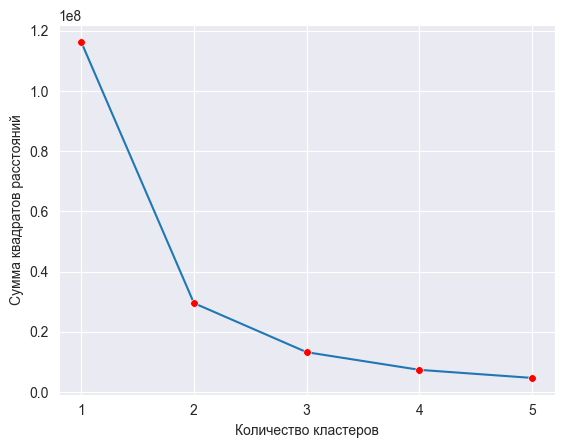

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

K = range(1, 6)
wss = []

test_data = data.copy()
test_data['type_name'] = LabelEncoder().fit_transform(test_data['type_name'])

for k in K:
    pipe = Pipeline([('col_transformer', col_transformer),
                     ('kmeans', KMeans(n_clusters=k))])
    pipe.fit(test_data)
    wss.append(pipe.named_steps['kmeans'].inertia_)

sns.lineplot(x=K, y=wss, zorder=1)
sns.scatterplot(x=K, y=wss, color='red', s=30, zorder=2)

plt.xticks(K)
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')

### Вместо TF-IDF возьмём BERT

In [23]:
import torch
import numpy as np
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from sklearn.base import TransformerMixin, BaseEstimator


class BertTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name="sberbank-ai/ruBert-base", batch_size=32):
        self.model_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModel.from_pretrained(self.model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        self.model.eval()
        embeddings = []

        for i in tqdm(range(0, len(X), self.batch_size)):
            batch = X[i:i + self.batch_size].to_numpy()
            inputs = self.tokenizer(list(batch), return_tensors="pt", truncation=True, padding=True, max_length=128)
            inputs = {key: value.to(self.device) for key, value in inputs.items()}

            with torch.no_grad():
                outputs = self.model(**inputs)
                cls_embeddings = outputs.last_hidden_state[:, 0, :]

            embeddings.extend(cls_embeddings.cpu().numpy())

        embeddings_array = np.array(embeddings)
        pca = PCA(n_components=10)
        reduced_embeddings = pca.fit_transform(embeddings_array)
        return reduced_embeddings

    def get_feature_names_out(self, input_features=None):
        return ['v1', 'v2', 'v3', 'v4', 'v5',
                'v6', 'v7', 'v8', 'v9', 'v10']


In [24]:
bert_t = [
    ('name', BertTransformer(), 'name'),
    ('desc', BertTransformer(), 'description'),
    ('ohe', OneHotEncoder(drop=['франчайзинг']), ['theme']),
    ('time', DateTimeTransformer(), 'time_start'),
    ('scl', MinMaxScaler(), ['price'])
]

bert_col_transformer = ColumnTransformer(transformers=bert_t,
                                         remainder='passthrough',
                                         force_int_remainder_cols=False)

In [25]:
bert_data = data.copy()
bert_data['type_name'] = LabelEncoder().fit_transform(bert_data['type_name'])
bert_data.head()

,name,description,time_start,ticket_type_id,price,type_name,theme
0,мастер класс от партнера hochland трендовые ре...,,2021-10-07 11:30:00+00:00,169,0.0,10,ресторан
1,виды пасты и равиоли техника лепки,уточняется,2021-10-05 11:30:00+00:00,155,0.0,10,ресторан
2,современное проектирование кухонных пространст...,уточняется,2022-10-18 12:45:00+00:00,473,1500.0,16,ресторан
3,подбор оборудования для кондитерского и пекарс...,,2021-10-05 07:30:00+00:00,122,2000.0,16,ресторан
4,волжские сезоны особенности работы с локальным...,,2021-10-07 12:30:00+00:00,13,0.0,10,ресторан


In [26]:
bert_data = bert_col_transformer.fit_transform(bert_data)
bert_cols = pd.Series(bert_col_transformer.get_feature_names_out()).apply(lambda x: x.replace('__', '_'))

bert_cols[26] = 'ticket_type_id'
bert_cols[27] = 'type'

bert_data = pd.DataFrame(bert_data, columns=bert_cols)
bert_data.to_csv('Data/events_bert.csv', index=False)
bert_data.head()

100%|██████████| 33/33 [01:13<00:00,  2.24s/it]


,name_v1,name_v2,name_v3,name_v4,name_v5,name_v6,name_v7,name_v8,name_v9,name_v10,...,desc_v9,desc_v10,ohe_theme_кофе,ohe_theme_отель,ohe_theme_ресторан,time_year,time_day,scl_price,ticket_type_id,type
0,-0.642775,-1.539036,-2.363179,-2.971523,3.054105,0.201454,0.577376,-0.377914,-1.582895,1.424717,...,-0.016458,-0.005623,0.0,0.0,1.0,2021.0,2.0,0.000000,169.0,10.0
1,-0.993217,2.751790,0.819835,0.152814,4.049608,-0.855854,0.897041,-2.109113,1.880999,-1.102247,...,2.046568,-1.200266,0.0,0.0,1.0,2021.0,0.0,0.000000,155.0,10.0
2,-1.608600,-0.470992,-1.754308,0.638951,0.384919,1.502212,2.078005,0.591114,0.329201,1.082906,...,2.046560,-1.200263,0.0,0.0,1.0,2022.0,1.0,0.142857,473.0,16.0
3,5.436803,-2.628274,-1.387451,0.966461,-0.794625,0.759180,0.856609,-4.021946,2.830719,0.070247,...,-0.016450,-0.005582,0.0,0.0,1.0,2021.0,0.0,0.190476,122.0,16.0
4,-1.937106,-0.657337,-1.558574,0.580340,1.965679,0.447733,-0.472324,-1.095739,0.776108,-0.510634,...,-0.016450,-0.005595,0.0,0.0,1.0,2021.0,2.0,0.000000,13.0,10.0
